/var/folders/t8/kft3r9x14dv07wt1prr3tmc00000gn/T/ipykernel_29339/2846523721.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oilData['dcoilwtico'].fillna(method='bfill', inplace=True)
/var/folders/t8/kft3r9x14dv07wt1prr3tmc00000gn/T/ipykernel_29339/2846523721.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oilData['dcoilwtico'].fillna(method='bfill', inplace=True)


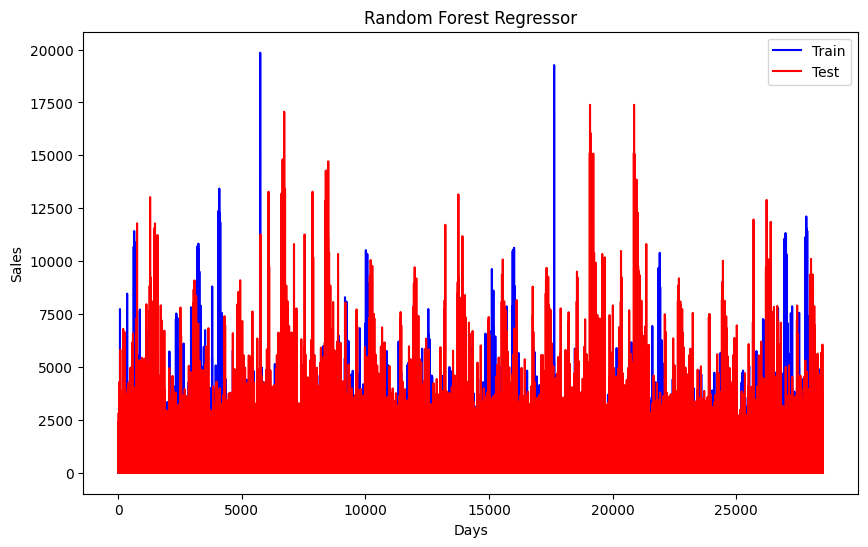

In [6]:
# submission best = 0.83180
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

# load each dataset
holidayEventsData = pd.read_csv('store-sales-time-series-forecasting/holidays_events.csv')
oilData = pd.read_csv('store-sales-time-series-forecasting/oil.csv')
storesData = pd.read_csv('store-sales-time-series-forecasting/stores.csv')
transactionsData = pd.read_csv('store-sales-time-series-forecasting/transactions.csv')
testData = pd.read_csv('store-sales-time-series-forecasting/test.csv', parse_dates=['date'])
trainData = pd.read_csv('store-sales-time-series-forecasting/train.csv', parse_dates=['date'])

# change to datetime
trainData['date'] = pd.to_datetime(trainData['date'])
testData['date'] = pd.to_datetime(testData['date'])
oilData['date'] = pd.to_datetime(oilData['date'])
holidayEventsData['date'] = pd.to_datetime(holidayEventsData['date'])
transactionsData['date'] = pd.to_datetime(transactionsData['date'])

# fix similar column names
storesData.rename(columns={'type': 'store_type'}, inplace=True)
holidayEventsData.rename(columns={'type': 'holiday_type'}, inplace=True)

# fill missing
oilData['dcoilwtico'].fillna(method='bfill', inplace=True)

#remove 0 sales
trainData = trainData[trainData['sales'] > 0]

# merging data and remove any empty values
trainData = trainData.merge(storesData, on='store_nbr', how='left')
trainData = trainData.merge(oilData, on='date', how='left')
trainData = trainData.merge(holidayEventsData, on='date', how='left')
trainData.fillna(0, inplace=True)
testData = testData.merge(storesData, on='store_nbr', how='left')
testData = testData.merge(oilData, on='date', how='left')
testData = testData.merge(holidayEventsData, on='date', how='left')
testData.fillna(0, inplace=True)

# convert all categorical to numerical
for col in ['family', 'city', 'state', 'store_type', 'holiday_type', 'locale', 'description', 'locale_name', 'transferred']:
    if col in trainData.columns:
        trainData[col] = trainData[col].astype('category').cat.codes
        testData[col] = testData[col].astype('category').cat.codes

# create a random forest regressor and fit the model
randForestReg = RandomForestRegressor(n_estimators=100, random_state=1)

# setup the data and drop unnecessary columns
xTrainData = trainData.drop(['date', 'id', 'sales'], axis=1)
yTrainData = trainData['sales']
xTestData = testData.drop(['date', 'id'], axis=1)

# using all features for now
randForestReg.fit(xTrainData, yTrainData)

# make predictions
testPred = randForestReg.predict(xTestData)

# display the results
plt.figure(figsize=(10, 6))
plt.plot(yTrainData[:len(testPred)], color='blue', label='Train')
plt.plot(testPred, color='red', label='Test')
plt.title('Random Forest Regressor')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.show()

# save the results to a csv file
testData['sales'] = testPred
testData[['id', 'sales']].to_csv('submission.csv', index=False)







